In [9]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from qlearningAgents import QLearningAgent
import gym
env = gym.make("MountainCar-v0")#MointainCar-v0
#plt.imshow(env.render('rgb_array'))

[2017-01-05 12:48:33,970] Making new env: MountainCar-v0


In [3]:
env.reset()

array([-0.55743211,  0.        ])

In [25]:
def preprocess(s):
    s[1] *=10
    
    return tuple(map(lambda v:round(v,2),s))

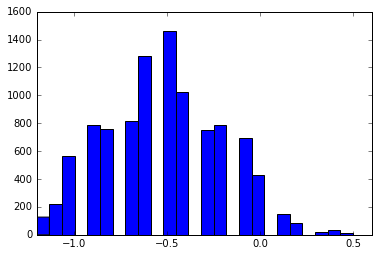

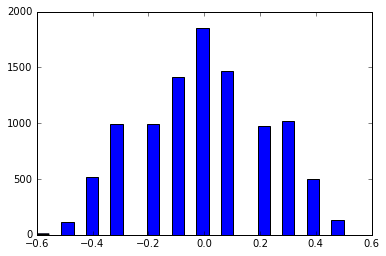

In [22]:
s=env.reset()
S = []
for i in range(10000):
    s, _, done,_ = env.step(env.action_space.sample())
    S.append(preprocess(s))
    if done:
        env.reset()
    

plt.hist(np.array(S)[:,0],bins=25);
plt.show()
plt.hist(np.array(S)[:,1],bins=25);
plt.show()

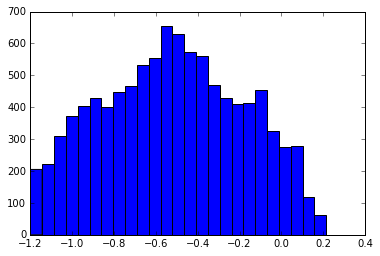

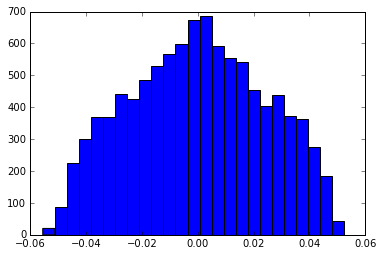

In [19]:
s=env.reset()
S = []
for i in range(10000):
    s, _, done,_ = env.step(env.action_space.sample())
    S.append(s)
    if done:
        env.reset()
    

plt.hist(np.array(S)[:,0],bins=25);
plt.show()
plt.hist(np.array(S)[:,1],bins=25);
plt.show()
    

In [23]:
agent = QLearningAgent(0.125,0.30,0.8,lambda s:range(env.action_space.n))

In [26]:
for i in range(100):
    total_r = 0.

    for _ in range(100):
        s = preprocess(env.reset())
        agent.epsilon -= 0.0001*agent.epsilon
        while 2:
            a = agent.getAction(s)
            s_next,r,done,_ = env.step(a)
            s_next = preprocess(s_next)
            total_r += r
            agent.update(s,a,s_next,r)
            s=s_next
            if done:break
    print(total_r / 100., agent.epsilon)


-9795.31 0.25012814938028494
-3208.81 0.24741642272337014
-2243.42 0.24473409484256303
-1974.73 0.2420808470154605
-1662.47 0.23945636397504014
-1570.52 0.23686033387219976
-1538.49 0.23429244823870218
-1411.87 0.23175240195052246
-1311.24 0.22923989319159122


KeyboardInterrupt: 

In [10]:
list((agent._qValues.keys()))[:10]

[(-0.10000000000000001, 0.0, -0.20000000000000001, -0.0),
 (-0.40000000000000002, -0.5, -0.10000000000000001, 0.20000000000000001),
 (0.59999999999999998,
  0.40000000000000002,
  -0.59999999999999998,
  -0.40000000000000002),
 (-0.29999999999999999,
  -0.29999999999999999,
  -0.40000000000000002,
  -0.10000000000000001),
 (-0.40000000000000002, -0.20000000000000001, -0.0, 0.10000000000000001),
 (0.69999999999999996,
  0.40000000000000002,
  -0.59999999999999998,
  -0.29999999999999999),
 (0.40000000000000002, -0.20000000000000001, -0.5, 0.10000000000000001),
 (0.29999999999999999, 0.40000000000000002, -0.5, -0.40000000000000002),
 (-0.5, -1.3999999999999999, 0.40000000000000002, 0.80000000000000004),
 (0.29999999999999999,
  0.29999999999999999,
  0.69999999999999996,
  0.10000000000000001)]

SFFF
FHFH
FFFH
HFFG
  (Left)
